After modifying train Data in part 1 Here we will do further steps like getting dummies, minimizing number of columns, train test split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc = {'figure.figsize':[10, 10]}, font_scale = 1.2)

In [ ]:
# pics = /content/drive/MyDrive/House price prediction/Final Project house prediction/House prediction pics
df = pd.read_csv("/content/drive/MyDrive/House price prediction/Final Project house prediction/final_mod_house_price_with missingno.csv")
df.head()

,Unnamed: 0,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure
0,0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No
1,1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,...,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other
2,2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other
3,3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,...,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No
4,4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,...,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av


In [ ]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [ ]:
pd.set_option('display.max_columns', 200)
df.head()

,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure
0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No
1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,0.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other
2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,0.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other
3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,0.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No
4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,0.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av


I was thinking do we really need areas, height of each part Like Lots, finished and unfinished parts of house?

Maybe it's very important thing but not for now we will try copying them and drop them off from our data frame and we will rely on one column **for now** .... finished percentage of house

Like If I was a customer What may get my interest is Like how much really I could pay if the house was unfinished or when

And Finished, unfinished percentages will may answer my question

# Initial thoughts

About those columns
- LotArea	
- MasVnrArea
- BsmtFinType2
- BsmtFinSF2	
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea WoodDeckSF
- OpenPorchSF EnclosedPorch

  - If Garage area, wood deck SF  = 0 There's not any Garage nor wood deck , else there's a garage and then we would check if existance of them would raise our house sale price

  - And same for number of floors like there's 2 floors and a basement or 1 floor with or w/o a basement. And same for pool

  - And we can split our Areas depending on mean like above mean or under mean
and mention the mean of total area

  - After checking sample submission we can tell we need only 2 columns as an output Id, Saleprice
    - In other meanings we only need to predict Sale price

## Another look

We really need to see each aspect visually of our data
- LotArea
- Mszoning And so on..


Let's translate them in arabic maybe it'll be easier to us

- What we got from pinterest and google in general?
 - Porsch مدخل المنزل ( المنطقة اللى ادام الباب)




In [ ]:
## Let's make a copy
df_n = df.copy()

In [ ]:
df_n.columns

Index(['dwelling_involved_type', 'general_zoning_classification', 'Total_area',
       'type_of_road', 'property_general_shape', 'property_Flatness',
       'utilities_types', 'LotConfig', 'LandSlope', 'Neighborhood',
       'dwelling_type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'roof_material', 'exterior_covering_1',
       'exterior_covering_2', 'masonry_veneer_type', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'electrical_system', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'total_rooms_above_grade', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'interior_finish_garage', 'garage_car_capacity',
       'GarageArea', 'GarageQual', 'GarageCond', 

In [ ]:
df_n['PoolArea'].isnull().values.any()

False

In [ ]:
df_n['2ndFlrSF'].isnull().values.any()

False

In [ ]:
df_n['Pool_exist'] = df_n['PoolArea'].apply(lambda x: 0 if x == 0 else 1) # if there's a pool or not
df_n['2ndFlr_exist'] = df_n['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1) ## If it's 2 floor or only 1

In [ ]:
# Lot Area is total size of property We can divide it by quartiles and make a new column to mention is it in first_quartile or it's in 2nd Quartile or 3rd quartile
quartiles = df_n['Total_area'].quantile([.25, .5, .75]).tolist()
quartiles

[7500.0, 9268.0, 11191.5]

In [ ]:
df_n['Total_area'].dtypes

dtype('float64')

#### We are trying to convert numerical variables into categorical variables and then we convert them to get dummies

In [ ]:
df_n["quantile ranges"] = pd.qcut(df_n["Total_area"], q=[0, 0.4, 0.8, 1],
                         labels=["lowest", "middle", "top"])
df_n.head()

,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile ranges
0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No,0,1,lowest
1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,0.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other,0,0,middle
2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,0.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other,0,1,middle
3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,0.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No,0,1,middle
4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,0.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av,0,1,top


In [ ]:
df_n.rename(columns = {'quantile ranges':"quantile_ranges_of_areas"}, inplace = True)
df_n

,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas
0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No,0,1,lowest
1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,0.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other,0,0,middle
2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,0.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other,0,1,middle
3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,0.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No,0,1,middle
4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,0.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av,0,1,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,60.0,RL,10186.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,1Fam,2Story,7.0,5.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,750.0,GasA,Ex,Y,SBrkr,1061.0,862.0,0.0,1923.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,1.0,Attchd,1992.0,RFn,2.0,564.0,TA,TA,Y,240.0,39.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal,190000.0,0.0,0.0,0.898667,0.101333,35.0,Norm,No,0,1,middle
1098,20.0,RL,9986.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,1Fam,1Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,428.0,Gd,TA,Other,Other,TA,Av,Unf,Unf,0.0,1795.0,GasA,Ex,Y,SBrkr,1795.0,0.0,0.0,1795.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,7.0,Typ,1.0,Attchd,2007.0,RFn,3.0,895.0,TA,TA,Y,0.0,49.0,0.0,0.0,0.0,0.0,0.0,2.0,2007.0,Other

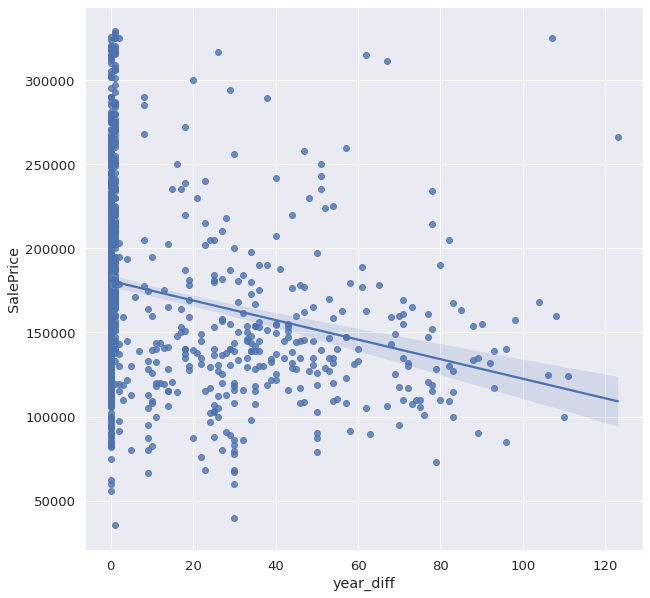

In [ ]:
sns.regplot(x="year_diff", y="SalePrice", data=df_n)

That's normal when year difference is large There's a drop in a price

But from the plot we can see there's also outliers Like there's more than 100 year difference and still sold with high prices

In [ ]:
	# Unfinished_percentage_of_Bsmt
df_n["quantile_ranges_of_basement_finished_areas"] = pd.qcut(df_n["finish_percentage_of_Bsmt"], q=[0, 0.4, 0.8, 1],
                         labels=["Hadn't_started", "nearly 50% finished", "mostly finished"])
df_n.head()

,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas
0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No,0,1,lowest,mostly finished
1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,0.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other,0,0,middle,nearly 50% finished
2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,0.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other,0,1,middle,nearly 50% finished
3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,0.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No,0,1,middle,Hadn't_started
4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,0.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av,0,1,top,nearly 50% finished


In [ ]:
## Let's drop finished columns
df_n_c = df_n.copy()
df_n_c.head()

,dwelling_involved_type,general_zoning_classification,Total_area,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,finish_percentage_of_Bsmt,Unfinished_percentage_of_Bsmt,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas
0,60.0,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,0.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,0.824766,0.175234,65.0,Norm,No,0,1,lowest,mostly finished
1,20.0,RL,9600.0,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,0.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,0.774960,0.225040,80.0,Other,Other,0,0,middle,nearly 50% finished
2,60.0,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,0.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,0.528261,0.471739,68.0,Norm,Other,0,1,middle,nearly 50% finished
3,70.0,RL,9550.0,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,0.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,0.285714,0.714286,60.0,Norm,No,0,1,middle,Hadn't_started
4,60.0,RL,14260.0,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,0.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,0.572052,0.427948,84.0,Norm,Av,0,1,top,nearly 50% finished


In [ ]:
df_n_c.drop(['finish_percentage_of_Bsmt', 'Unfinished_percentage_of_Bsmt','1stFlrSF', '2ndFlrSF','BsmtFinSF2','Total_area'], axis=1, inplace = True)
df_n_c.head()

,dwelling_involved_type,general_zoning_classification,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas
0,60.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,65.0,Norm,No,0,1,lowest,mostly finished
1,20.0,RL,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,80.0,Other,Other,0,0,middle,nearly 50% finished
2,60.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,68.0,Norm,Other,0,1,middle,nearly 50% finished
3,70.0,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,60.0,Norm,No,0,1,middle,Hadn't_started
4,60.0,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,84.0,Norm,Av,0,1,top,nearly 50% finished


In [ ]:
df_n_c.shape

(1102, 73)

In [ ]:
df_n_c['dwelling_involved_type'].value_counts()

20.0     418
60.0     227
50.0     105
120.0     76
160.0     55
80.0      49
70.0      47
30.0      43
90.0      23
190.0     16
85.0      16
75.0      11
45.0       9
180.0      4
40.0       3
Name: dwelling_involved_type, dtype: int64

In [ ]:
## let's rename those values into original categorical names from description

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

di = {20: "1-STORY 1946 & NEWER ALL STYLES", 30: "1-STORY 1945 & OLDER", 
      40: "1-STORY W/FINISHED ATTIC ALL AGES", 45:"1-1/2 STORY - UNFINISHED ALL AGES" ,50:"1-1/2 STORY FINISHED ALL AGES" ,
      60:"2-STORY 1946 & NEWER" ,70:"2-STORY 1945 & OLDER" ,
      75:"2-1/2 STORY ALL AGES" ,80:"SPLIT OR MULTI-LEVEL" , 
      85:"SPLIT FOYER" ,90:"DUPLEX - ALL STYLES AND AGES" , 
      120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER" , 150:"1-1/2 STORY PUD - ALL AGES" ,
      160:"2-STORY PUD - 1946 & NEWER" , 180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER" ,
      190: "2 FAMILY CONVERSION - ALL STYLES AND AGES" }

df_n_c.replace({"dwelling_involved_type": di}, inplace=True)

df_n_c.head()

,dwelling_involved_type,general_zoning_classification,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,65.0,Norm,No,0,1,lowest,mostly finished
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,6.0,8.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,80.0,Other,Other,0,0,middle,nearly 50% finished
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,7.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,68.0,Norm,Other,0,1,middle,nearly 50% finished
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,7.0,5.0,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,60.0,Norm,No,0,1,middle,Hadn't_started
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,8.0,5.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,84.0,Norm,Av,0,1,top,nearly 50% finished


In [ ]:
#       10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor

di_2 = {10: "Very Excellent", 9: "Excellent", 
      8: "very good", 7:"good" ,6:"above average" ,
      5:"average" ,4:"below average" ,
      3:"fair" ,2:"poor" , 
      1:"very poor"}

df_n_c.replace({"OverallQual": di_2}, inplace=True)
df_n_c.replace({"OverallCond": di_2}, inplace=True)
df_n_c.head()

,dwelling_involved_type,general_zoning_classification,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,65.0,Norm,No,0,1,lowest,mostly finished
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,above average,very good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,80.0,Other,Other,0,0,middle,nearly 50% finished
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,68.0,Norm,Other,0,1,middle,nearly 50% finished
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,good,average,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,60.0,Norm,No,0,1,middle,Hadn't_started
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,very good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,84.0,Norm,Av,0,1,top,nearly 50% finished


# Let's look what are these columns means

- dwelling_involved_type (done)
- LowQualAreaSF (done)
- MasVnrArea (done)
- WoodDeckSF (done)
- OpenPorchSF (done)
- PoolArea (done)
- OverallQual (done)
- OverallCond (done)
- TotalBsmtSF
- GrLivArea
- EnclosedPorch	
- three_season_porch_area
- ScreenPorch
- other_features_values
- LotFrontage

In [ ]:
df_n_c['WoodDeck_exist'] = df_n_c['WoodDeckSF'].apply(lambda x: 0 if x == 0 else 1) # if there's a WoodDeck or not
df_n_c['OpenPorch_exist'] = df_n_c['OpenPorchSF'].apply(lambda x: 0 if x == 0 else 1) # if there's a OpenPorch or not

In [ ]:
df_n_c['YrSold'].value_counts()

2007.0    254
2009.0    253
2006.0    242
2008.0    222
2010.0    131
Name: YrSold, dtype: int64

In [ ]:
df_n_c.head()

,dwelling_involved_type,general_zoning_classification,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas,WoodDeck_exist,OpenPorch_exist
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0,0.0,0.0,65.0,Norm,No,0,1,lowest,mostly finished,0,1
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,above average,very good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0,0.0,0.0,80.0,Other,Other,0,0,middle,nearly 50% finished,1,0
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0,1.0,1.0,68.0,Norm,Other,0,1,middle,nearly 50% finished,0,1
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,good,average,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Other,140000.0,55.0,1.0,60.0,Norm,No,0,1,middle,Hadn't_started,0,1
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,very good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0,0.0,0.0,84.0,Norm,Av,0,1,top,nearly 50% finished,1,1


In [ ]:
df_n_c['LowQualFinSF'].value_counts()

0.0      1088
360.0       2
80.0        2
528.0       1
144.0       1
390.0       1
420.0       1
473.0       1
156.0       1
232.0       1
481.0       1
120.0       1
397.0       1
Name: LowQualFinSF, dtype: int64

In [ ]:
df_n_c['MasVnrArea'].value_counts()

0.0       644
108.0       8
72.0        8
180.0       8
16.0        6
         ... 
584.0       1
1129.0      1
250.0       1
292.0       1
428.0       1
Name: MasVnrArea, Length: 263, dtype: int64

In [ ]:
df_n_c['masonry_veneer_exist'] = df_n_c['MasVnrArea'].apply(lambda x: 0 if x == 0 else 1) # if there's a masonry veneer or not
# df_n_c['LowQualFin_percentage'] = df_n_c['LowQualFinSF']/df_n['Total_area'] #Percentage of low quality area
df_n_c['Low_Quality_areas_existance'] = df_n_c['LowQualFinSF'].apply(lambda x: 0 if x == 0 else 1) # if there's a low quality areas in property or not

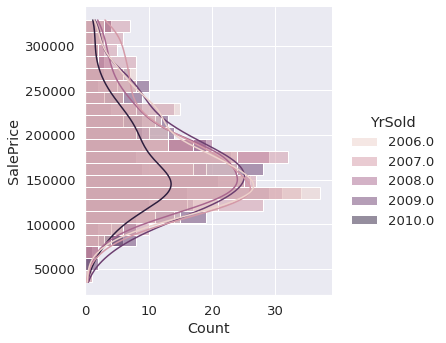

In [ ]:
sns.displot(data=df_n_c, y="SalePrice", kde=True, hue="YrSold")

In [ ]:
df_n_c.to_csv("house_price_pred.csv", encoding= 'UTF-8', index = False)

In [ ]:
df_n_c['WoodDeck_exist'] = df_n_c['WoodDeck_exist'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's a WoodDeck or not
df_n_c['OpenPorch_exist'] = df_n_c['OpenPorch_exist'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's a OpenPorch or not
df_n_c['Is_diff'] = df_n_c['Is_diff'].apply(lambda x: "No difference" if x == 0 else "difference") # if there's a year_diff or not
df_n_c['Pool_exist'] = df_n_c['Pool_exist'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's a pool or not
df_n_c['2ndFlr_exist'] = df_n_c['2ndFlr_exist'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's 2ndFlr or not
df_n_c['masonry_veneer_exist'] = df_n_c['masonry_veneer_exist'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's a masonry veneer or not
df_n_c['Low_Quality_areas_existance'] = df_n_c['Low_Quality_areas_existance'].apply(lambda x: "no low quality" if x == 0 else "there's low quality") # if there's a low quality areas in property or not


di_3 = {1.0: "Jan", 2.0: "Feb", 
      3.0: "Mar", 4.0:"Apr" ,5.0:"May" ,
      6.0:"Jun" ,7.0:"Jul" ,
      8.0:"Aug" ,9.0:"Sep" , 
      10.0:"Oct",11.0:"Nov", 12.0:"Dec"}

di_4 = {2006.0: "2006", 2007.0: "2007", 
      2008.0: "2008", 2009.0:"2009" ,2010.0:"2010"}

df_n_c.replace({"MoSold": di_3}, inplace=True)
df_n_c.replace({"YrSold": di_4}, inplace=True)
df_n_c.head()

,dwelling_involved_type,general_zoning_classification,type_of_road,property_general_shape,property_Flatness,utilities_types,LotConfig,LandSlope,Neighborhood,dwelling_type,HouseStyle,OverallQual,OverallCond,RoofStyle,roof_material,exterior_covering_1,exterior_covering_2,masonry_veneer_type,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,electrical_system,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,total_rooms_above_grade,Functional,Fireplaces,GarageType,GarageYrBlt,interior_finish_garage,garage_car_capacity,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,three_season_porch_area,ScreenPorch,PoolArea,other_features_values,MoSold,YrSold,SaleType,SaleCondition,SalePrice,year_diff,Is_diff,LotFrontage,Condition_all,Bsmt Exposure,Pool_exist,2ndFlr_exist,quantile_ranges_of_areas,quantile_ranges_of_basement_finished_areas,WoodDeck_exist,OpenPorch_exist,masonry_veneer_exist,Low_Quality_areas_existance
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,Other,Gd,TA,No,GLQ,Unf,856.0,GasA,Ex,Y,SBrkr,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,0.0,Feb,2008,WD,Normal,208500.0,0.0,No difference,65.0,Norm,No,doesn't exist,exist,lowest,mostly finished,doesn't exist,exist,exist,no low quality
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,Other,Gtl,Veenker,1Fam,1Story,above average,very good,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Other,Gd,TA,Gd,ALQ,Unf,1262.0,GasA,Ex,Y,SBrkr,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,0.0,May,2007,WD,Normal,181500.0,0.0,No difference,80.0,Other,Other,doesn't exist,doesn't exist,middle,nearly 50% finished,exist,doesn't exist,doesn't exist,no low quality
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Other,Gd,TA,Mn,GLQ,Unf,920.0,GasA,Ex,Y,SBrkr,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,0.0,Sep,2008,WD,Normal,223500.0,1.0,difference,68.0,Norm,Other,doesn't exist,exist,middle,nearly 50% finished,doesn't exist,exist,exist,no low quality
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,Crawfor,1Fam,2Story,good,average,Gable,CompShg,Wd Sdng,Other,None,0.0,TA,TA,Other,TA,Other,No,ALQ,Unf,756.0,GasA,Gd,Y,SBrkr,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,0.0,Feb,2006,WD,Other,140000.0,55.0,difference,60.0,Norm,No,doesn't exist,exist,middle,Hadn't_started,doesn't exist,exist,doesn't exist,no low quality
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Other,Gtl,NoRidge,1Fam,2Story,very good,average,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Other,Gd,TA,Av,GLQ,Unf,1145.0,GasA,Ex,Y,SBrkr,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,0.0,Dec,2008,WD,Normal,250000.0,0.0,No difference,84.0,Norm,Av,doesn't exist,exist,top,nearly 50% finished,exist,exist,exist,no low quality


In [ ]:
for col in df_n_c.select_dtypes('object').columns:
	print(col)
	print(df_n_c[col].unique())
	print('_'*50)

dwelling_involved_type
['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER ALL STYLES'
 '2-STORY 1945 & OLDER' '1-1/2 STORY FINISHED ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 '1-1/2 STORY - UNFINISHED ALL AGES'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 '1-STORY 1945 & OLDER' 'SPLIT FOYER' 'DUPLEX - ALL STYLES AND AGES'
 'SPLIT OR MULTI-LEVEL' '2-STORY PUD - 1946 & NEWER'
 '2-1/2 STORY ALL AGES' 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-STORY W/FINISHED ATTIC ALL AGES']
__________________________________________________
general_zoning_classification
['RL' 'RM' 'Other']
__________________________________________________
type_of_road
['Pave' 'Grvl']
__________________________________________________
property_general_shape
['Reg' 'IR1' 'Other']
__________________________________________________
property_Flatness
['Lvl' 'Other']
__________________________________________________
utilities_types
['AllPub' 'NoSeWa']
_________________________________________________

In [ ]:
df_n_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 77 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   dwelling_involved_type                      1102 non-null   object  
 1   general_zoning_classification               1102 non-null   object  
 2   type_of_road                                1102 non-null   object  
 3   property_general_shape                      1102 non-null   object  
 4   property_Flatness                           1102 non-null   object  
 5   utilities_types                             1102 non-null   object  
 6   LotConfig                                   1102 non-null   object  
 7   LandSlope                                   1102 non-null   object  
 8   Neighborhood                                1102 non-null   object  
 9   dwelling_type                               1102 non-null   object  
 10  

In [ ]:
for col in df_n_c.select_dtypes('float64').columns:
	print(col)

MasVnrArea
TotalBsmtSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
total_rooms_above_grade
Fireplaces
GarageYrBlt
garage_car_capacity
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
three_season_porch_area
ScreenPorch
PoolArea
other_features_values
SalePrice
year_diff
LotFrontage


In [ ]:
df_dumm = pd.get_dummies(df_n_c, columns = df_n_c.select_dtypes('object').columns,drop_first = True)

In [ ]:
df_dumm = pd.get_dummies(df_dumm, columns = df_dumm.select_dtypes('category').columns,drop_first = True)

In [ ]:
df_dumm.shape

(1102, 174)

## Now let's drop areas

- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- three_season_porch_area
- PoolArea
- ScreenPorch
- GrLivArea
- LowQualFinSF
- TotalBsmtSF
- MasVnrArea


In [ ]:
df_n_c.columns

Index(['dwelling_involved_type', 'general_zoning_classification',
       'type_of_road', 'property_general_shape', 'property_Flatness',
       'utilities_types', 'LotConfig', 'LandSlope', 'Neighborhood',
       'dwelling_type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'roof_material', 'exterior_covering_1',
       'exterior_covering_2', 'masonry_veneer_type', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'electrical_system', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'total_rooms_above_grade', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'interior_finish_garage',
       'garage_car_capacity', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

Porch means شرفه او بلكونة

A three season room and a four season room may look similar at first glance, but the main distinguishing factors between the two are the framing system and glass used. The frame of a four season room is thermally engineered so the room can be heated and cooled cost effectively. Since it can be temperature controlled, it can be used year-round, regardless of the weather. Depending on your location, a three season room is typically only used in the spring, summer, and fall, when outside temperatures are mild. However, if you reside in a mild climate, a three season room may be perfect for you. It really depends on how you plan to use the room.

Above Grade means

In real estate, above grade means the portion of a home that is above the ground. The term is usually used to describe a room or square footage. For example, 3 bedrooms above grade means 3 bedrooms that are not in a basement

Full bathroom vs half bathroom

A full bathroom is made up of four parts: a sink, a shower, a bathtub, and a toilet. Anything less than that, and you can't officially consider it a full bath.

A half bathroom is a bathroom that does not contain a bath or a shower, just a toilet and sink

In [ ]:
df_dumm['three_enteries_exist'] = df_dumm['three_season_porch_area'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's a 3 enteries to the house or not
df_dumm['Open_Porch_exist'] = df_dumm['OpenPorchSF'].apply(lambda x: "doesn't exist" if x == 0 else "exist") # if there's an open porch or not
df_dumm['Screen_Porch_exist'] = df_dumm['ScreenPorch'].apply(lambda x: "doesn't exist" if x == 0 else "exist")

In [ ]:
df_dumm['Garage_exist'] = df_dumm['GarageArea'].apply(lambda x: "doesn't exist" if x == 0 else "exist")

In [ ]:
df_dumm['GarageYrBlt'].value_counts()

2005.0    53
2004.0    43
2006.0    42
2003.0    36
2007.0    34
          ..
1927.0     1
1906.0     1
1900.0     1
2010.0     1
1934.0     1
Name: GarageYrBlt, Length: 93, dtype: int64

In [ ]:
df_dumm['Garage_exist'].value_counts()

exist    1102
Name: Garage_exist, dtype: int64

GrLivArea	

In [ ]:
## GrLivArea:  We could just make a new column to check if it was above mean or not
df_dumm.drop(['GrLivArea'], axis = 1, inplace = True)

In [ ]:
df_dumm.drop(['GarageArea','WoodDeckSF','OpenPorchSF','three_season_porch_area', 'PoolArea','ScreenPorch', 'LowQualFinSF','TotalBsmtSF','MasVnrArea'],axis = 1, inplace = True)

In [ ]:
df_dumm['EnclosedPorch'].value_counts()

0.0      951
112.0     12
120.0      5
192.0      4
96.0       4
        ... 
189.0      1
293.0      1
239.0      1
67.0       1
123.0      1
Name: EnclosedPorch, Length: 95, dtype: int64

In [ ]:
df_dumm['Enclosed Porch exist'] = df_dumm['EnclosedPorch'].apply(lambda x: "doesn't exist" if x == 0 else "exist")

In [ ]:
df_dumm.drop(['LotFrontage','EnclosedPorch','GarageYrBlt','Garage_exist'],axis = 1, inplace = True)

In [ ]:
for col in df_dumm.select_dtypes('object').columns:
	print(col)
	print(df_dumm[col].unique())
	print('_'*50)

three_enteries_exist
["doesn't exist" 'exist']
__________________________________________________
Open_Porch_exist
['exist' "doesn't exist"]
__________________________________________________
Screen_Porch_exist
["doesn't exist" 'exist']
__________________________________________________
Enclosed Porch exist
["doesn't exist" 'exist']
__________________________________________________


In [ ]:
df_dumm = pd.get_dummies(df_dumm, columns = df_dumm.select_dtypes('object').columns,drop_first = True)
df_dumm.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,total_rooms_above_grade,Fireplaces,garage_car_capacity,other_features_values,SalePrice,year_diff,dwelling_involved_type_1-1/2 STORY FINISHED ALL AGES,dwelling_involved_type_1-STORY 1945 & OLDER,dwelling_involved_type_1-STORY 1946 & NEWER ALL STYLES,dwelling_involved_type_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,dwelling_involved_type_1-STORY W/FINISHED ATTIC ALL AGES,dwelling_involved_type_2 FAMILY CONVERSION - ALL STYLES AND AGES,dwelling_involved_type_2-1/2 STORY ALL AGES,dwelling_involved_type_2-STORY 1945 & OLDER,dwelling_involved_type_2-STORY 1946 & NEWER,dwelling_involved_type_2-STORY PUD - 1946 & NEWER,dwelling_involved_type_DUPLEX - ALL STYLES AND AGES,dwelling_involved_type_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,dwelling_involved_type_SPLIT FOYER,dwelling_involved_type_SPLIT OR MULTI-LEVEL,general_zoning_classification_RL,general_zoning_classification_RM,type_of_road_Pave,property_general_shape_Other,property_general_shape_Reg,property_Flatness_Other,utilities_types_NoSeWa,LotConfig_Other,LandSlope_Other,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,dwelling_type_Other,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_Very Excellent,OverallQual_above average,OverallQual_average,OverallQual_below average,OverallQual_fair,OverallQual_good,OverallQual_poor,OverallQual_very good,OverallCond_above average,OverallCond_average,OverallCond_below average,OverallCond_fair,OverallCond_good,OverallCond_poor,OverallCond_very good,RoofStyle_Hip,RoofStyle_Other,roof_material_Other,exterior_covering_1_MetalSd,exterior_covering_1_Other,exterior_covering_1_Plywood,exterior_covering_1_VinylSd,exterior_covering_1_Wd Sdng,exterior_covering_2_MetalSd,exterior_covering_2_Other,exterior_covering_2_Plywood,exterior_covering_2_VinylSd,exterior_covering_2_Wd Sdng,masonry_veneer_type_None,masonry_veneer_type_Other,ExterQual_Other,ExterQual_TA,ExterCond_Other,ExterCond_TA,BsmtQual_Other,BsmtQual_TA,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Other,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,CentralAir_Y,electrical_system_SBrkr,KitchenQual_Other,KitchenQual_TA,Functional_Typ,GarageType_Detchd,GarageType_Other,interior_finish_garage_RFn,interior_finish_garage_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_WD,SaleCondition_Other,Is_diff_difference,Condition_all_Other,Bsmt Exposure_No,Bsmt Exposure_Other,Pool_exist_exist,2ndFlr_exist_exist,WoodDeck_exist_exist,OpenPorch_exist_exist,masonry_veneer_exist_exist,Low_Quality_areas_existance_there's low quality,quantile_ranges_of_areas_middle,quantile_ranges_of_areas_top,quantile_ranges_of_basement_finished_areas_nearly 50% finished,quantile_ranges_of_basement_finished_areas_mostly finished,three_enteries_exist_exist,Open_Porch_exist_exist,Screen_Porch_exist_exist,Enclosed Porch exist_exist
0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,0.0,208500.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,

In [ ]:
df_dumm.shape

(1102, 165)

In [ ]:
df_dumm.to_csv("house_price_pred_dummies(ready_to_split).csv", encoding= 'UTF-8', index = False)